In [15]:
#import libraries
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

#load data
df = pd.read_csv('/Users/saumyaariyawansha/Documents/Data Science/python_exercises/data_jobs.csv')

#data cleaning
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [16]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

Text(0, 0.5, '')

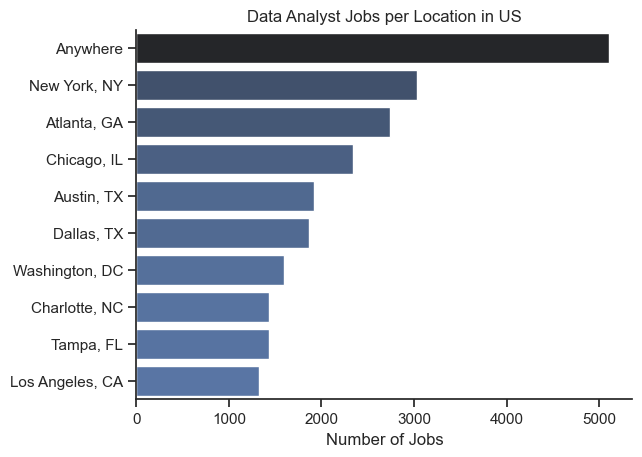

In [21]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title('Data Analyst Jobs per Location in US')
plt.xlabel('Number of Jobs')
plt.ylabel('')

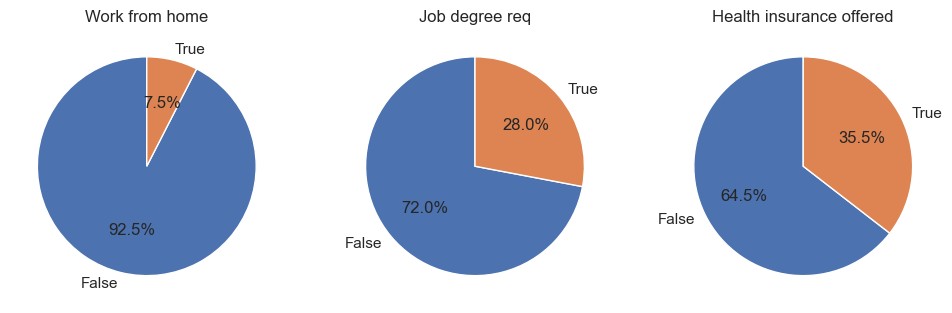

In [24]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(12,5)

dict_column = {
    'job_work_from_home' : 'Work from home',
    'job_no_degree_mention' : 'Job degree req',
    'job_health_insurance' : 'Health insurance offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%',  labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()

Text(0, 0.5, '')

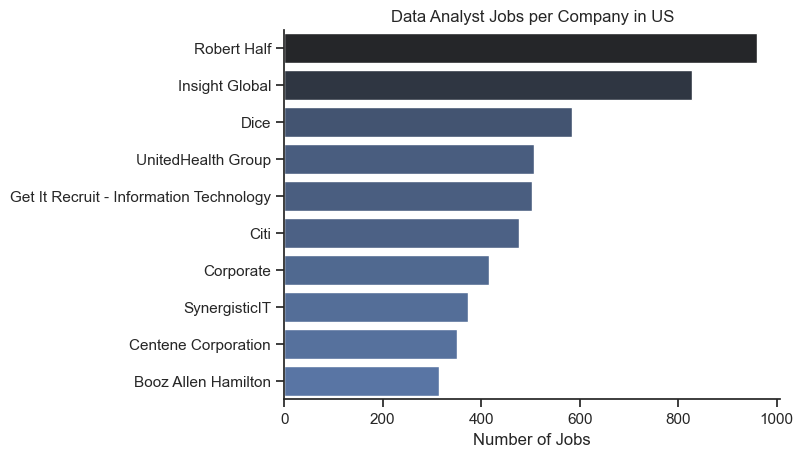

In [23]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title('Data Analyst Jobs per Company in US')
plt.xlabel('Number of Jobs')
plt.ylabel('')